<a href="https://colab.research.google.com/github/OscarIvaVP/categorias-crecimiento-producion/blob/main/Umbrales-Crecimiento-BMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DETERMINAR HISTORICO DE PRODUCCIÓN POR CUENCA A PARTIR DE MUNICIPIOS**

In [1]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Cargando los archivos
proporcion_df = pd.read_excel('/content/drive/MyDrive/ENTREGABLES-FINALES-BANCO-MUNDIAL/CRECIMIENTO-LOGISTICO-CULTIVOS/datos-historico-cuenca/proporcion.xlsx')
historico_arroz_df = pd.read_excel('/content/drive/MyDrive/ENTREGABLES-FINALES-BANCO-MUNDIAL/CRECIMIENTO-LOGISTICO-CULTIVOS/datos-historico-cuenca/historicos-municipios/historico-ganaderia.xlsx')

In [8]:
# Combinando los datos utilizando el nombre del municipio como clave
merged_df = pd.merge(historico_arroz_df, proporcion_df, on="Municipio")

# Lista de años desde 2001 hasta 2022
years = list(range(2001, 2023))

# Lista de columnas de cuencas
basin_columns = proporcion_df.columns[1:]

# Creando un DataFrame vacío para almacenar los resultados
basin_hectares_df = pd.DataFrame(index=basin_columns, columns=years)

# Calculando las hectáreas para cada cuenca y cada año
for basin in basin_columns:
    for year in years:
        basin_hectares_df.loc[basin, year] = (merged_df[year] * merged_df[basin]).sum()

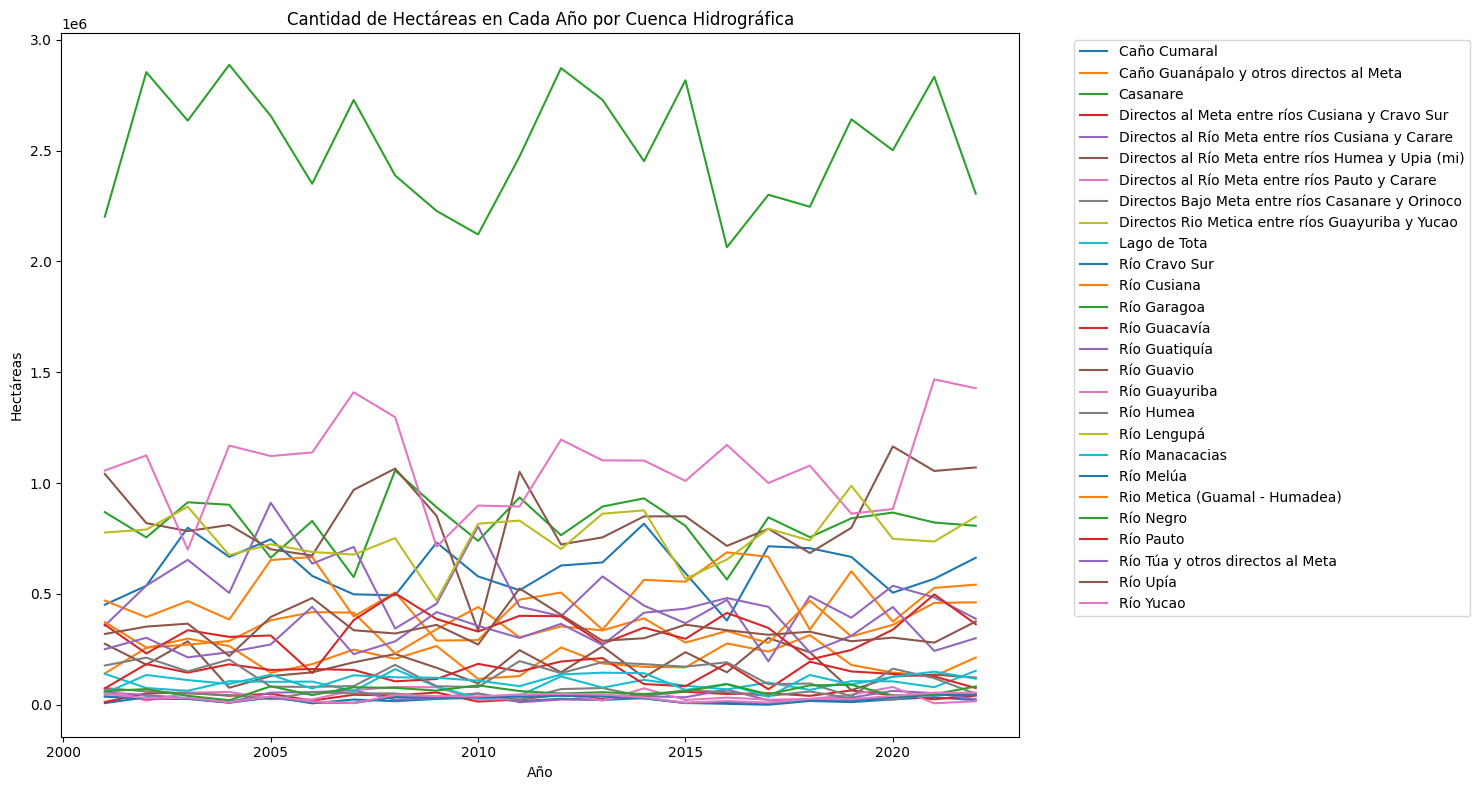

In [9]:
# Configurar tamaño
plt.figure(figsize=(15, 8))

# Graficar cada cuenca
for basin in basin_columns:
    plt.plot(years, basin_hectares_df.loc[basin], label=basin)

# agregar etiqeutas
plt.xlabel('Año')
plt.ylabel('Hectáreas')
plt.title('Cantidad de Hectáreas en Cada Año por Cuenca Hidrográfica')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ajustar
plt.tight_layout()
plt.show()

In [10]:
# Resultado: DataFrame con las cuencas hidrográficas en las filas y los años en las columnas
basin_hectares_df = basin_hectares_df.transpose()

print(basin_hectares_df.head(2))

basin_hectares_df.to_excel("/content/drive/MyDrive/ENTREGABLES-FINALES-BANCO-MUNDIAL/CRECIMIENTO-LOGISTICO-CULTIVOS/datos-historico-cuenca/historicos-cuenca/ganaderia-historico-cuencas.xlsx")

     Caño Cumaral Caño Guanápalo y otros directos al Meta       Casanare  \
2001  7649.763619                           141573.043049  868924.218305   
2002  33891.98043                           256505.887954  754995.453381   

     Directos al Meta entre ríos Cusiana y Cravo Sur  \
2001                                    12325.862591   
2002                                    51502.329197   

     Directos al Río Meta entre ríos Cusiana y Carare  \
2001                                     56299.532669   
2002                                     43877.560899   

     Directos al Río Meta entre ríos Humea y Upia (mi)  \
2001                                     275146.630344   
2002                                     181029.530362   

     Directos al Río Meta entre ríos Pauto y Carare  \
2001                                   73139.735398   
2002                                   18447.938766   

     Directos Bajo Meta entre ríos Casanare y Orinoco  \
2001                            

# **DETERMINAR CRECIMIENTO PORCENTUAL**

In [13]:
# Cargando los datos históricos de los cuatro cultivos
arroz_df = pd.read_excel('/content/drive/MyDrive/ENTREGABLES-FINALES-BANCO-MUNDIAL/CRECIMIENTO-LOGISTICO-CULTIVOS/datos-historico-cuenca/historicos-cuenca/arroz-historico-cuencas.xlsx')
cacao_df = pd.read_excel('/content/drive/MyDrive/ENTREGABLES-FINALES-BANCO-MUNDIAL/CRECIMIENTO-LOGISTICO-CULTIVOS/datos-historico-cuenca/historicos-cuenca/cacao-historico-cuencas.xlsx')
ganaderia_df = pd.read_excel('/content/drive/MyDrive/ENTREGABLES-FINALES-BANCO-MUNDIAL/CRECIMIENTO-LOGISTICO-CULTIVOS/datos-historico-cuenca/historicos-cuenca/ganaderia-historico-cuencas.xlsx')
palma_df = pd.read_excel('/content/drive/MyDrive/ENTREGABLES-FINALES-BANCO-MUNDIAL/CRECIMIENTO-LOGISTICO-CULTIVOS/datos-historico-cuenca/historicos-cuenca/palma-historico-cuencas.xlsx')

# Mostrar las primeras filas de cada marco de datos para comprender la estructura
# arroz_df.head(1), cacao_df.head(1), ganaderia_df.head(1), palma_df.head(1)

In [16]:
# Función para derretir y etiquetar los datos.
def process_df(df, crop_name):
    # Melting the dataframe to have "año", "cuenca" and "hectareas"
    df_melted = df.melt(id_vars=['Unnamed: 0'], var_name='cuenca', value_name='hectareas')
    df_melted.rename(columns={'Unnamed: 0': 'año'}, inplace=True)

    # Agregar nombre cultivos
    df_melted['cultivo'] = crop_name

    return df_melted

# Procesar cada cultivo
arroz_processed = process_df(arroz_df, 'arroz')
cacao_processed = process_df(cacao_df, 'cacao')
ganaderia_processed = process_df(ganaderia_df, 'ganadería')
palma_processed = process_df(palma_df, 'palma')

# Concatenar los archivos
final_df = pd.concat([arroz_processed, cacao_processed, ganaderia_processed, palma_processed], ignore_index=True)

# Guardar el dataframe
final_df.to_excel("/content/drive/MyDrive/ENTREGABLES-FINALES-BANCO-MUNDIAL/CRECIMIENTO-LOGISTICO-CULTIVOS/datos-cuenca-tasa/datos-unidos-cuencas.xlsx", index=False)

# Visualización de las primeras filas del marco de datos final
final_df.head()

,año,cuenca,hectareas,cultivo
0,2001,Caño Cumaral,62.892257,arroz
1,2002,Caño Cumaral,851.767677,arroz
2,2003,Caño Cumaral,374.349735,arroz
3,2004,Caño Cumaral,61.953567,arroz
4,2005,Caño Cumaral,879.552913,arroz


In [18]:
# Importando la biblioteca de pandas
import pandas as pd

# Cargando el archivo compartido nuevamente
datos_unidos_cuencas = pd.read_excel('/content/drive/MyDrive/ENTREGABLES-FINALES-BANCO-MUNDIAL/CRECIMIENTO-LOGISTICO-CULTIVOS/datos-cuenca-tasa/datos-unidos-cuencas.xlsx')

# Ordenando los datos por cuenca, cultivo y año para calcular correctamente la tasa de crecimiento
datos_unidos_cuencas.sort_values(by=['cuenca', 'cultivo', 'año'], inplace=True)

# Calculando la tasa de crecimiento anual como el porcentaje de cambio en las hectáreas para cada cuenca y cultivo
datos_unidos_cuencas['crecimiento_anual'] = datos_unidos_cuencas.groupby(['cuenca', 'cultivo'])['hectareas'].pct_change() * 100

# Guardamos el dataframe
datos_unidos_cuencas.to_excel("/content/drive/MyDrive/ENTREGABLES-FINALES-BANCO-MUNDIAL/CRECIMIENTO-LOGISTICO-CULTIVOS/datos-cuenca-tasa/crecimiento-anual-cuencas.xlsx", index=False)

# Mostrando las primeras filas del DataFrame actualizado
datos_unidos_cuencas.head()


,año,cuenca,hectareas,cultivo,crecimiento_anual
44,2001,Casanare,22903.008443,arroz,NaN
45,2002,Casanare,18894.606572,arroz,-17.501639
46,2003,Casanare,24036.219066,arroz,27.212064
47,2004,Casanare,13792.831619,arroz,-42.616467
48,2005,Casanare,23126.409458,arroz,67.669773


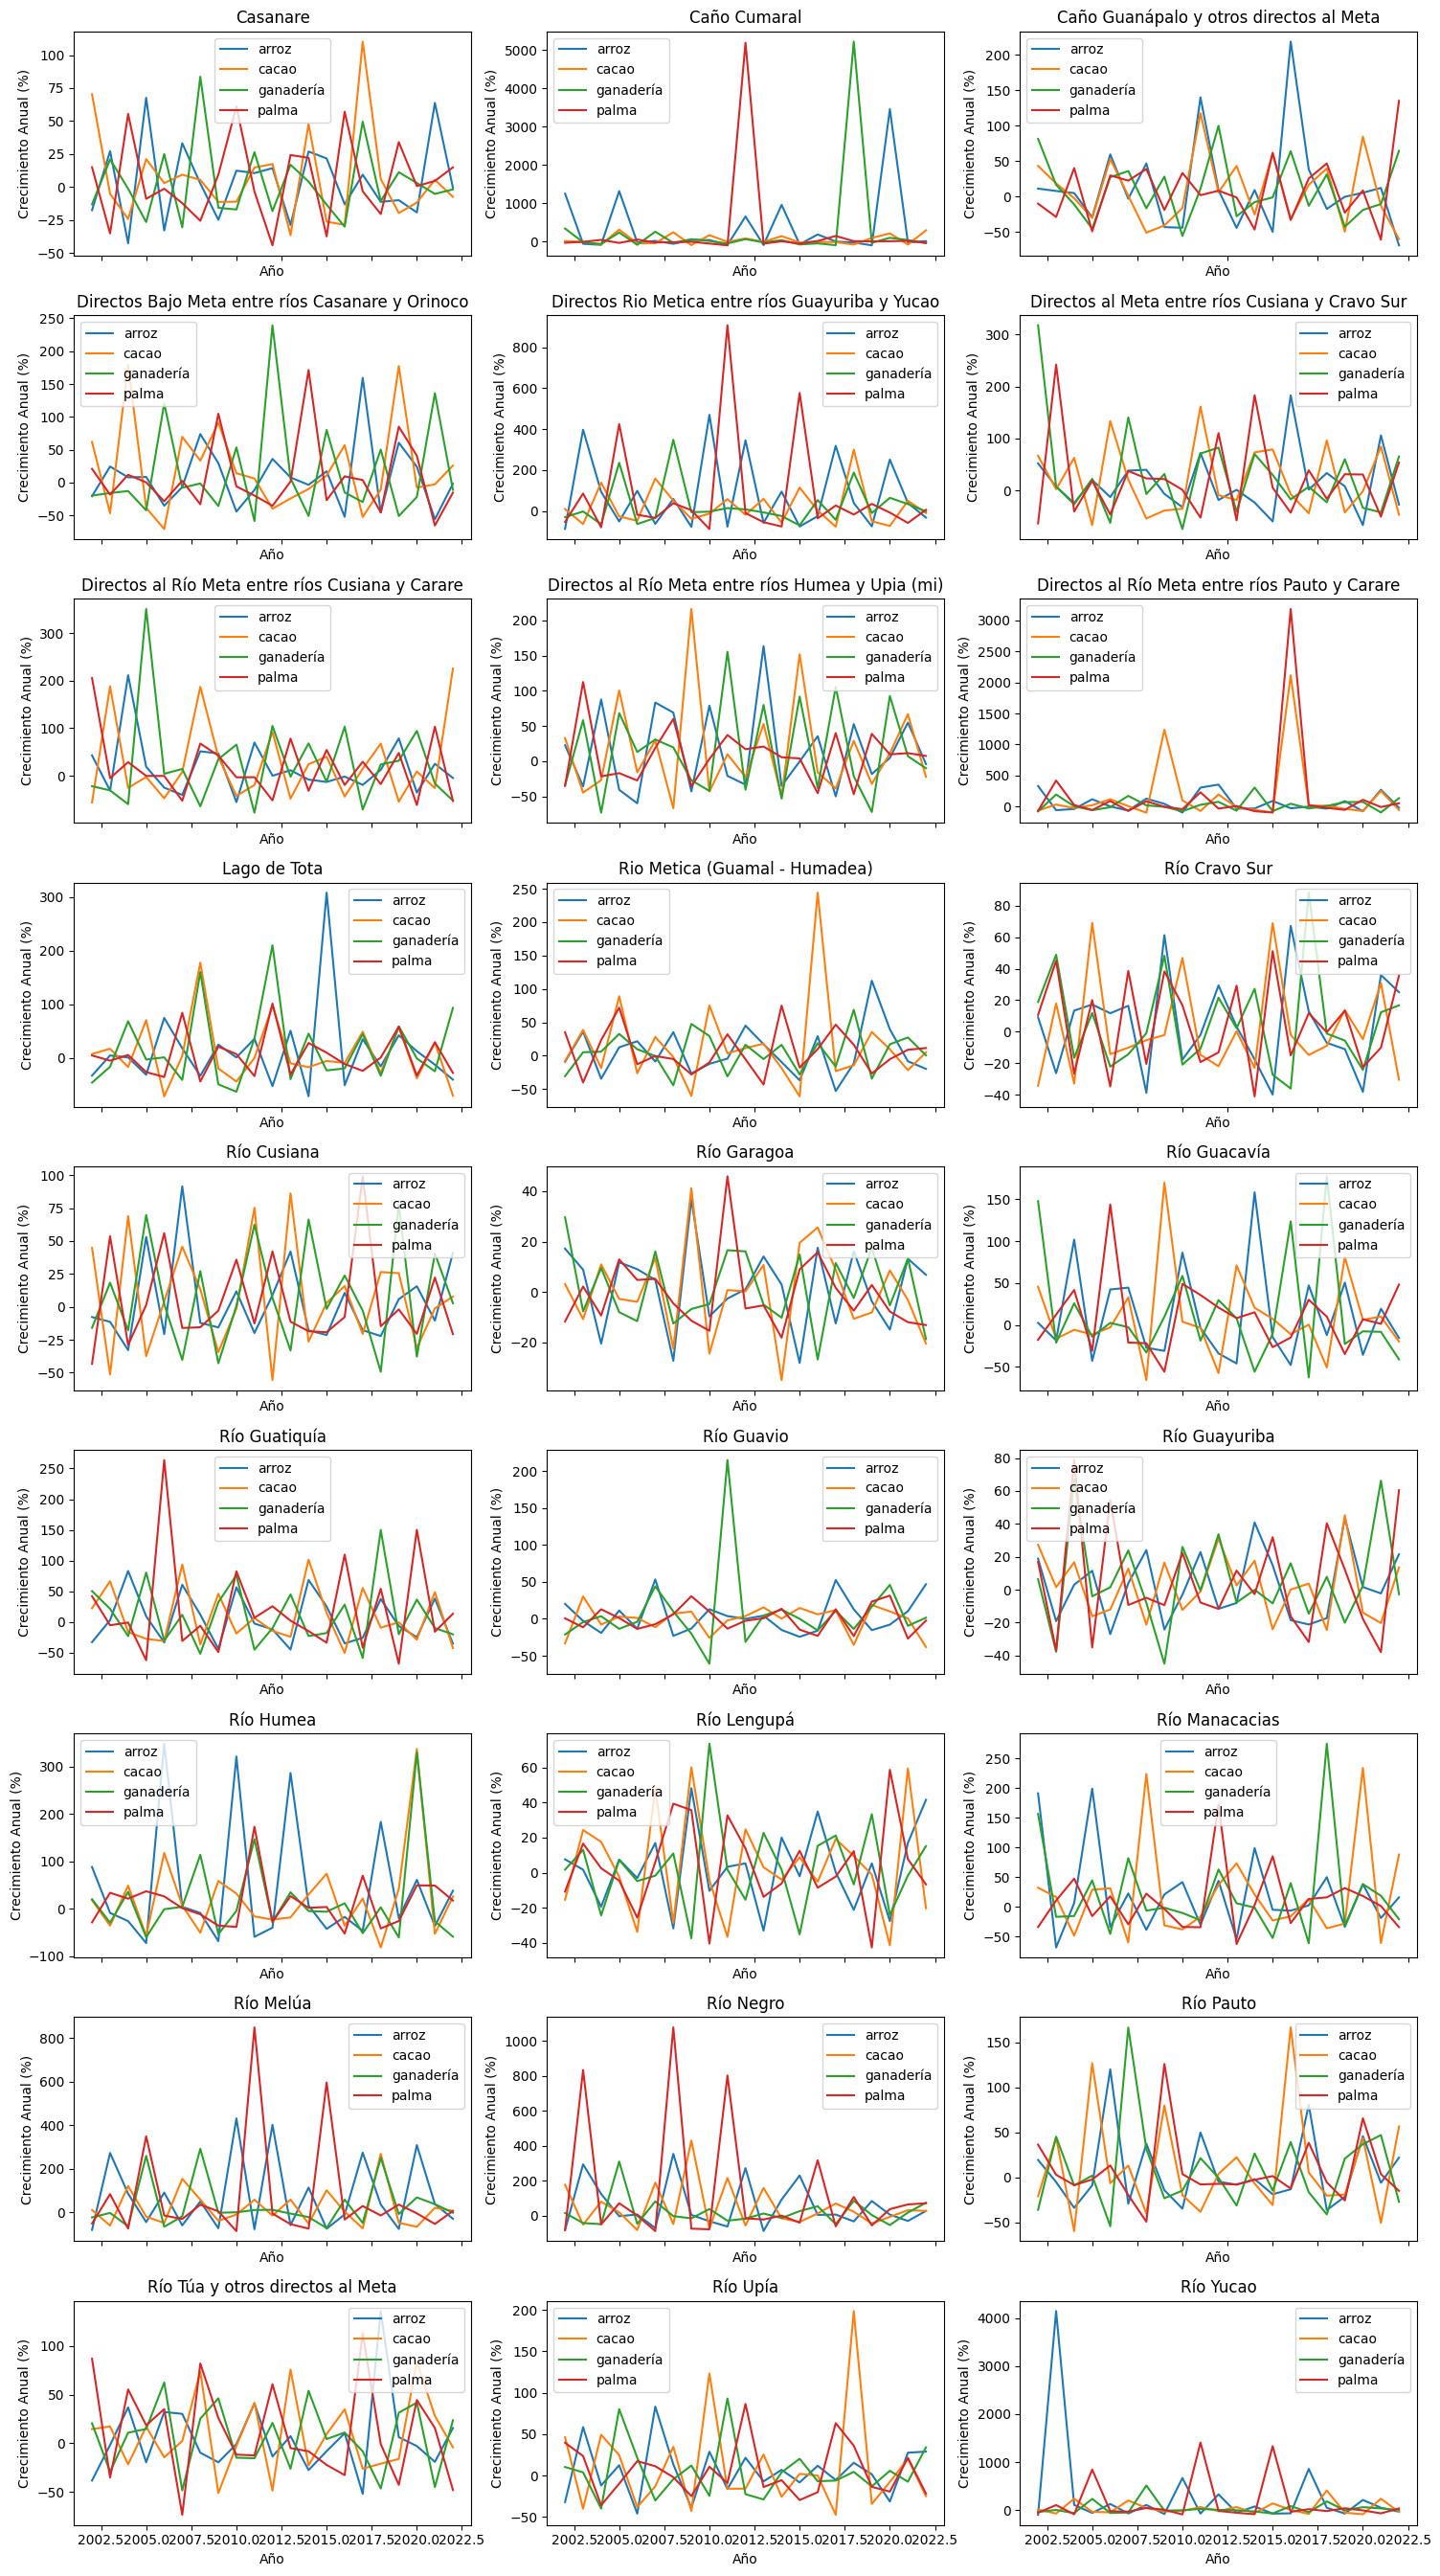

In [19]:
# Obtener los nombres únicos de las cuencas
unique_basins = datos_unidos_cuencas['cuenca'].drop_duplicates()

# Configurando las subparcelas con 9 filas y 3 columnas
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(15, 27), sharex=True)

# Aplane los ejes para facilitar la iteración
axes_flat = axes.flatten()

# Trazado del porcentaje de crecimiento anual para cada cuenca
for ax, basin in zip(axes_flat, unique_basins):
    subset_df = datos_unidos_cuencas[datos_unidos_cuencas['cuenca'] == basin]
    for crop in subset_df['cultivo'].unique():
        crop_subset = subset_df[subset_df['cultivo'] == crop]
        ax.plot(crop_subset['año'], crop_subset['crecimiento_anual'], label=crop)
    ax.set_title(f'{basin}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Crecimiento Anual (%)')
    ax.legend()

plt.tight_layout()
plt.show()

# **ESTABLECER UMBRALES DE CRECIMIENTO**

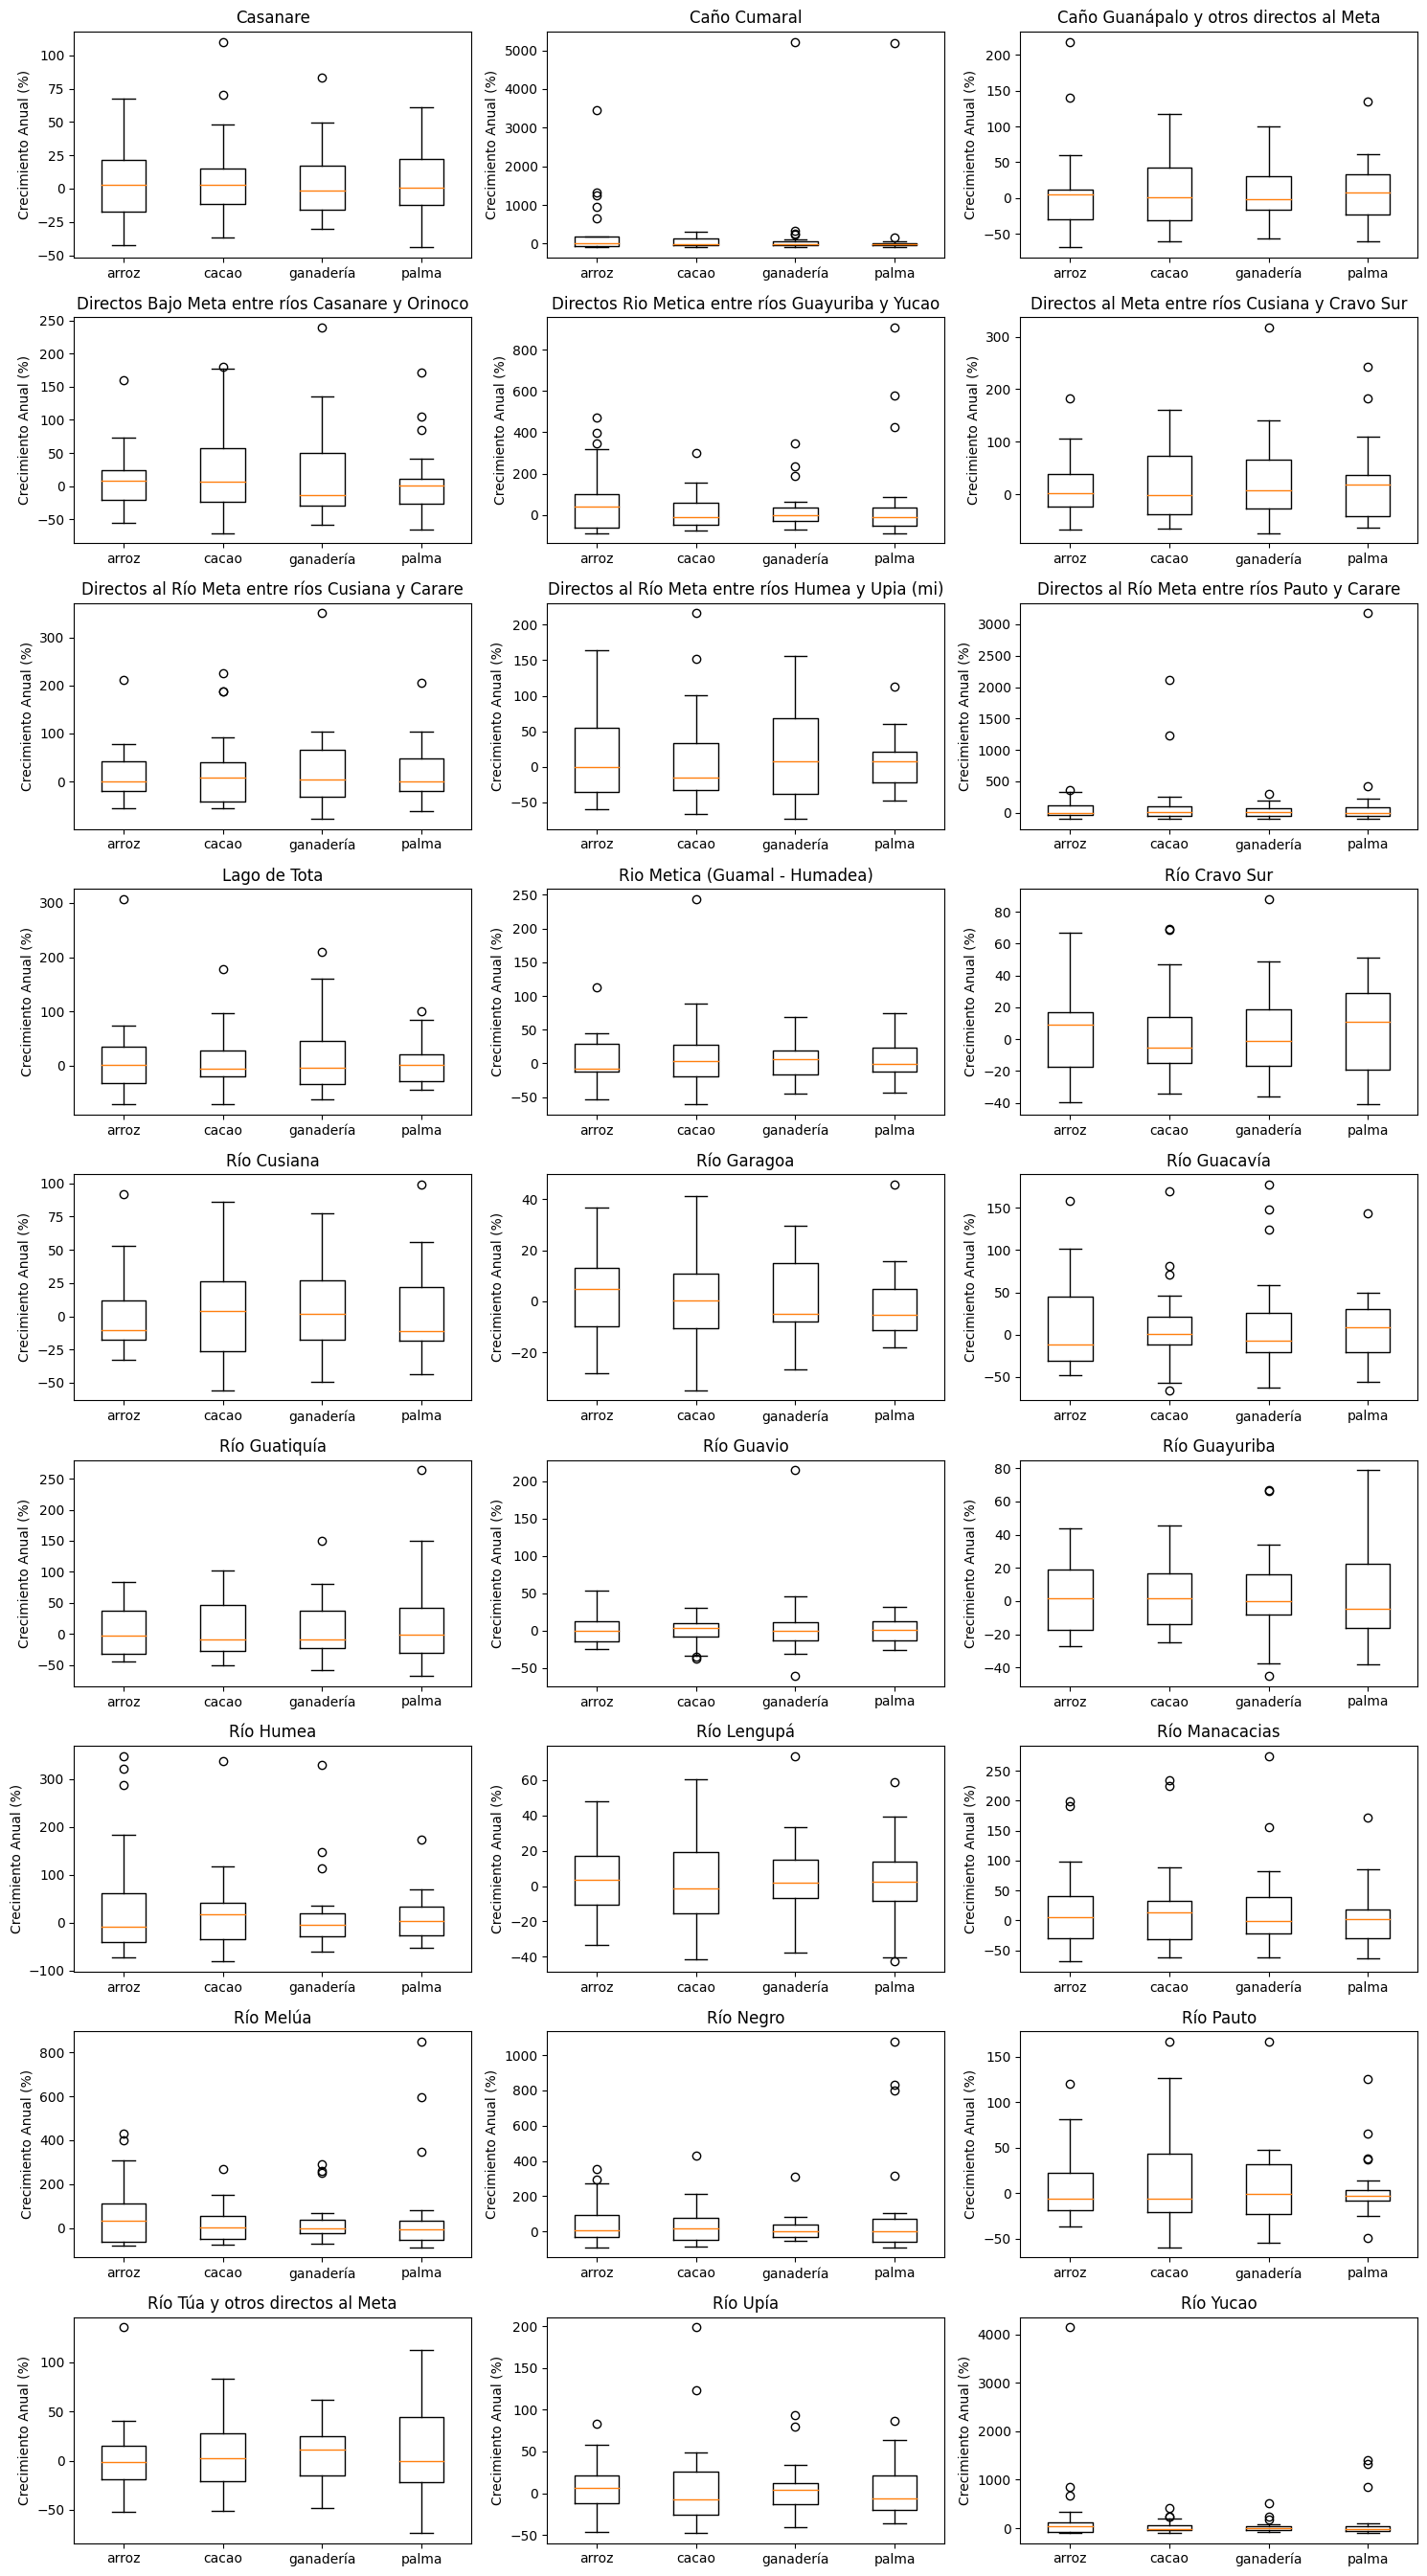

In [20]:
# Configuración de las subparcelas con 9 filas y 3 columnas para las gráficas de caja
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(15, 27), sharex=False)

# Aplane los ejes para facilitar la iteración
axes_flat = axes.flatten()

# Trazar el diagrama de caja para el porcentaje de crecimiento anual para cada cuenca
for ax, basin in zip(axes_flat, unique_basins):
    subset_df = datos_unidos_cuencas[datos_unidos_cuencas['cuenca'] == basin]

    # Preparando datos para los boxplot
    boxplot_data = [subset_df[subset_df['cultivo'] == crop]['crecimiento_anual'].dropna() for crop in subset_df['cultivo'].unique()]

    # Agregando boxplot
    ax.boxplot(boxplot_data, labels=subset_df['cultivo'].unique())
    ax.set_title(f'{basin}')
    ax.set_ylabel('Crecimiento Anual (%)')

plt.tight_layout()
plt.show()


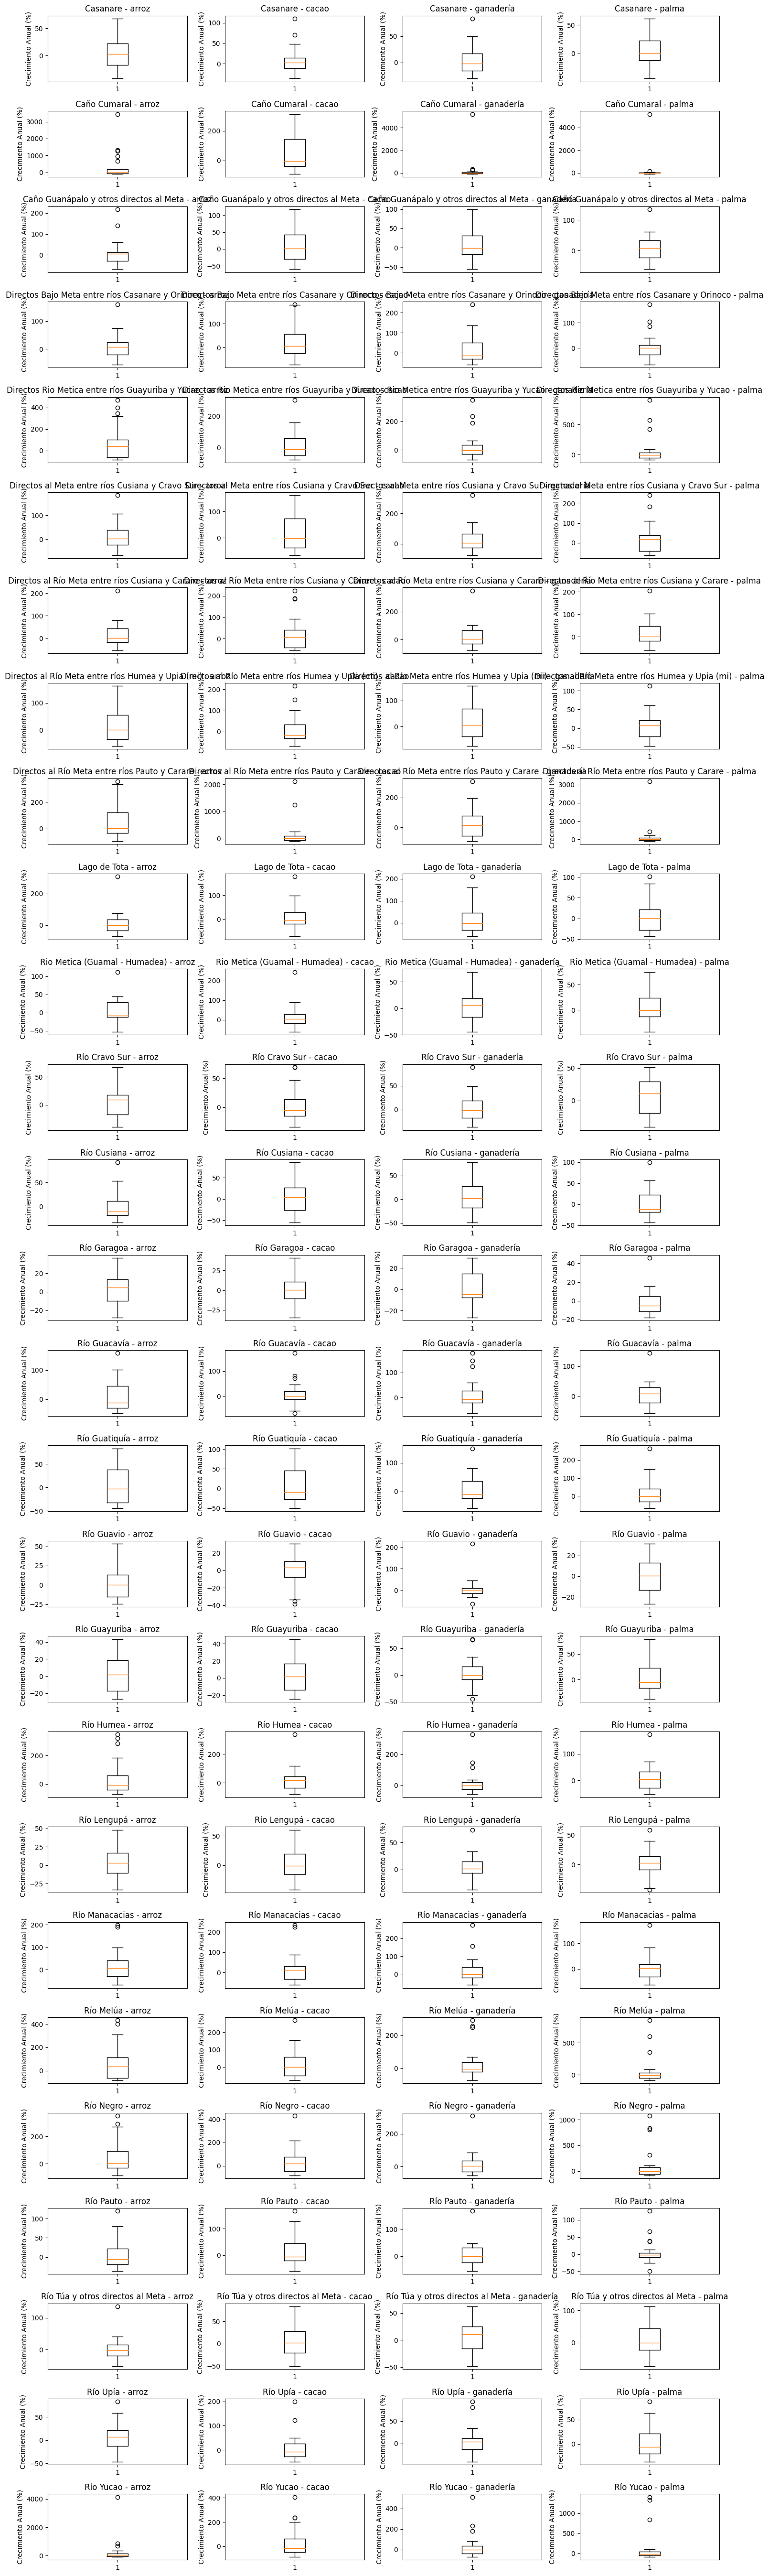

In [21]:
# Obtener los nombres de cultivos únicos
unique_crops = datos_unidos_cuencas['cultivo'].drop_duplicates()

# Configuración de las subparcelas con 27 filas y 4 columnas para las gráficas de boxplots
fig, axes = plt.subplots(nrows=27, ncols=4, figsize=(15, 54), sharex=False)

# Trazar el diagrama de caja para el porcentaje de crecimiento anual para cada cuenca y cultivo
for row, basin in enumerate(unique_basins):
    subset_df = datos_unidos_cuencas[datos_unidos_cuencas['cuenca'] == basin]
    for col, crop in enumerate(unique_crops):
        ax = axes[row, col]

        # Preparación de datos para el diagrama de caja
        boxplot_data = subset_df[subset_df['cultivo'] == crop]['crecimiento_anual'].dropna()

        # Agregando boxplot
        ax.boxplot(boxplot_data)
        ax.set_title(f'{basin} - {crop}')
        ax.set_ylabel('Crecimiento Anual (%)')

plt.tight_layout()
plt.show()

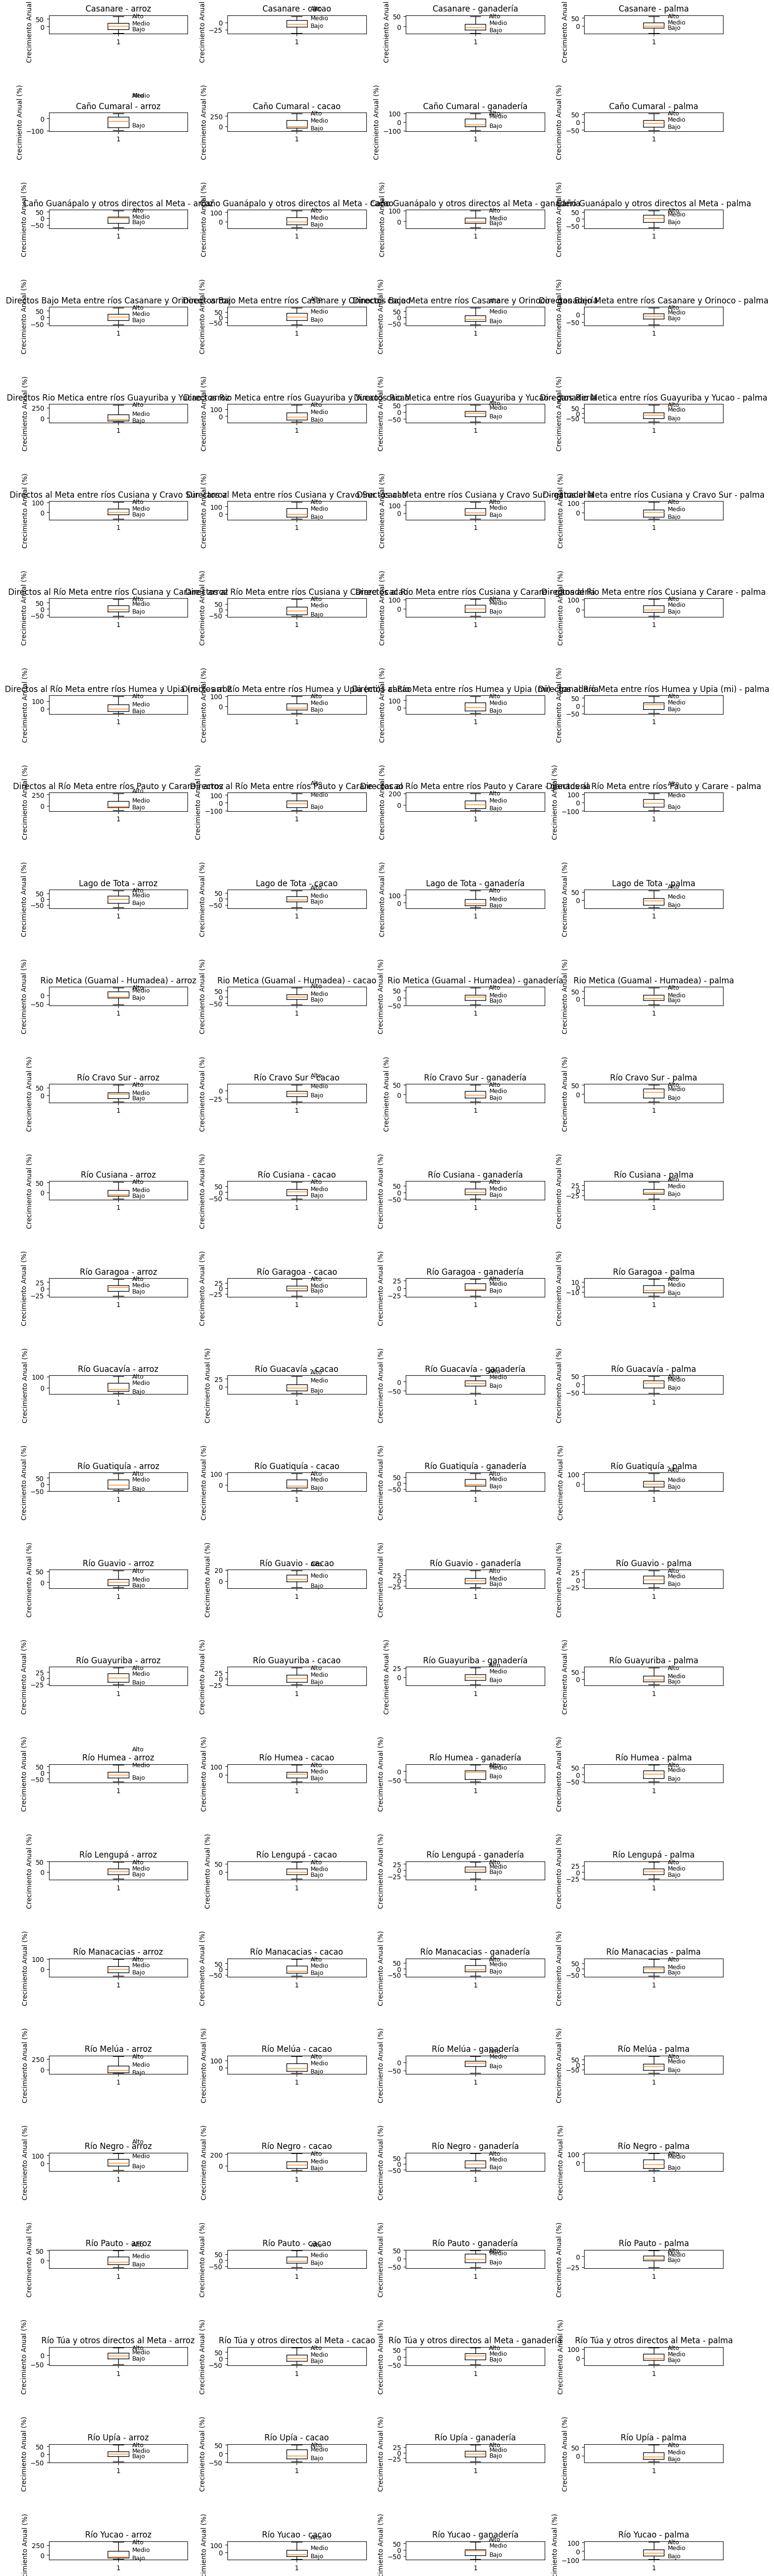

In [22]:
# Función para categorizar el crecimiento basado en cuartiles
def categorize_growth(value, q1, q3):
    if value <= q1:
        return "Crecimiento bajo"
    elif value <= q3:
        return "Crecimiento medio"
    else:
        return "Crecimiento alto"

# Configurar las subparcelas con 27 filas y 4 columnas para las gráficas de caja personalizadas
fig, axes = plt.subplots(nrows=27, ncols=4, figsize=(15, 54), sharex=False)

# Trazar el diagrama de caja personalizado para cada cuenca y cultivo
for row, basin in enumerate(unique_basins):
    subset_df = datos_unidos_cuencas[datos_unidos_cuencas['cuenca'] == basin]
    for col, crop in enumerate(unique_crops):
        ax = axes[row, col]

        # Obtener datos para la cuenca y el cultivo específicos
        growth_data = subset_df[subset_df['cultivo'] == crop]['crecimiento_anual'].dropna()

        # Cálculo de cuartiles e IQR para filtrar valores atípicos
        q1, q3 = growth_data.quantile([0.25, 0.75])
        iqr = q3 - q1
        filtered_data = growth_data[(growth_data >= q1 - 1.5 * iqr) & (growth_data <= q3 + 1.5 * iqr)]

        # Categorización del crecimiento según el cuartiles
        growth_categories = filtered_data.apply(categorize_growth, q1=q1, q3=q3)

        # Agregar diagrama de caja sin valores atípicos
        ax.boxplot(filtered_data, sym='') # sym='' removes outlier points
        ax.set_title(f'{basin} - {crop}')
        ax.set_ylabel('Crecimiento Anual (%)')

        # Mostrar categorías de crecimiento
        ax.text(1.1, q1, "Bajo", fontsize=9, va="center", ha="left")
        ax.text(1.1, q3, "Medio", fontsize=9, va="center", ha="left")
        ax.text(1.1, filtered_data.max(), "Alto", fontsize=9, va="center", ha="left")

plt.tight_layout()
plt.show()


In [23]:
# Creando un DataFrame vacío para almacenar los umbrales de crecimiento con valores mínimos y máximos
umbrales_min_max_df = pd.DataFrame(columns=['cuenca', 'cultivo', 'crecimiento_bajo_min', 'crecimiento_bajo_max',
                                            'crecimiento_medio_min', 'crecimiento_medio_max', 'crecimiento_alto_min', 'crecimiento_alto_max'])

# Calculando los umbrales de crecimiento con valores mínimos y máximos para cada cuenca y cultivo
for basin in unique_basins:
    subset_df = datos_unidos_cuencas[datos_unidos_cuencas['cuenca'] == basin]
    for crop in unique_crops:
        growth_data = subset_df[subset_df['cultivo'] == crop]['crecimiento_anual'].dropna()

        # Calculando quartiles y IQR para filtrar atípicos
        q1, q3 = growth_data.quantile([0.25, 0.75])
        iqr = q3 - q1
        filtered_data = growth_data[(growth_data >= q1 - 1.5 * iqr) & (growth_data <= q3 + 1.5 * iqr)]

        # Agregando los umbrales con valores mínimos y máximos al DataFrame
        umbrales_min_max_df.loc[len(umbrales_min_max_df)] = [basin, crop, filtered_data.min(), q1, q1, q3, q3, filtered_data.max()]

# Guardando los umbrales en un archivo Excel
umbrales_min_max_filepath = '/content/drive/MyDrive/ENTREGABLES-FINALES-BANCO-MUNDIAL/CRECIMIENTO-LOGISTICO-CULTIVOS/datos-cuenca-tasa/umbrales_crecimiento.xlsx'
umbrales_min_max_df.to_excel(umbrales_min_max_filepath, index=False)

# Mostrando las primeras filas del DataFrame de umbrales con valores mínimos y máximos
umbrales_min_max_df.head(), umbrales_min_max_filepath


(         cuenca    cultivo  crecimiento_bajo_min  crecimiento_bajo_max  \
 0      Casanare      arroz            -42.616467            -17.501639   
 1      Casanare      cacao            -36.398201            -11.732518   
 2      Casanare  ganadería            -30.570093            -15.702610   
 3      Casanare      palma            -44.138711            -12.188556   
 4  Caño Cumaral      arroz            -95.681511            -56.302521   
 
    crecimiento_medio_min  crecimiento_medio_max  crecimiento_alto_min  \
 0             -17.501639              21.692818             21.692818   
 1             -11.732518              14.789193             14.789193   
 2             -15.702610              16.922757             16.922757   
 3             -12.188556              22.160140             22.160140   
 4             -56.302521             187.981510            187.981510   
 
    crecimiento_alto_max  
 0             67.669773  
 1             47.842595  
 2             49.571